# Datos del grupo

### Grupo 10
Integrantes:
* Renato Ramirez 
* Matias Torrejon
* Benjamin Pavez
* Diego Cisternas

Consideraciones:
* Antes de subir el archivo a Github se le hizo una limpieza de los valores '?', de las columnas que no utilizaremos y de los juegos que no consideraremos.
* El criterio que utilizamos para seleccionar los juegos considerados fue a través de la cantidad de apariciones en el dataset, es decir, los que tenían mayor cantidad de registros.

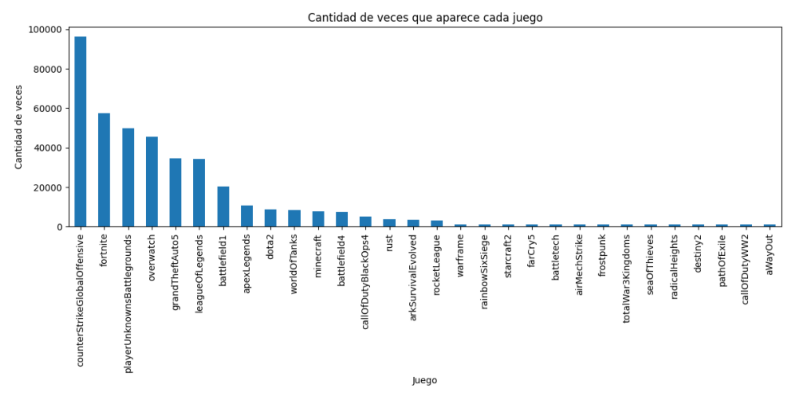

In [3]:
import matplotlib.pyplot as plt
import urllib
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns

url2 = 'https://github.com/BenjaminPavez/Estadistica-Computacional-INF280/blob/main/grafico1.png?raw=true'
img = np.array(Image.open(urllib.request.urlopen(url2)))
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

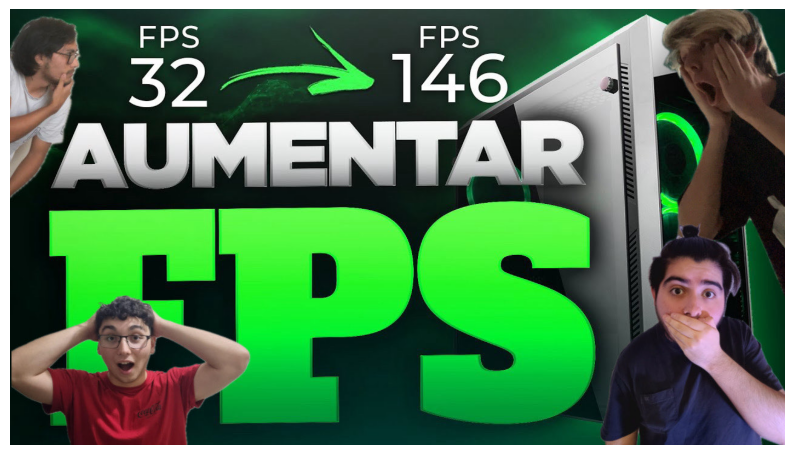

In [4]:
url = "https://github.com/BenjaminPavez/Estadistica-Computacional-INF280/blob/main/miniatura.jpg?raw=true"
img = np.array(Image.open(urllib.request.urlopen(url)))

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

# Introducción

En la actualidad, el disfrute de los videojuegos en PC es una actividad ampliamente extendida, tanto de manera casual como dedicada. Sin embargo, para garantizar una experiencia de juego óptima, se requiere disponer de componentes de hardware capaces de ejecutar los juegos de manera fluida, permitiendo así disfrutar al máximo de las capacidades visuales y de rendimiento que estos ofrecen. En este sentido, dos de los componentes más críticos para lograr un buen desempeño son el procesador (CPU) y la tarjeta gráfica (GPU), cuya potencia determina en gran medida la calidad y fluidez de las imágenes generadas, expresada en el número de cuadros por segundo (FPS).

Dada la relevancia de estos componentes y su frecuente actualización para satisfacer las demandas de los videojuegos más exigentes, se busca estudiar qué juegos son más sensibles a los cambios en el hardware. Es decir, identificar aquellos en los que una mejora en CPU o GPU no resulta en una diferencia significativa en los FPS, así como aquellos cuyo rendimiento ya alcanza niveles óptimos y donde una mejora adicional carece de utilidad práctica. Este estudio tiene como objetivo discernir en qué juegos no justifica invertir un presupuesto adicional en la actualización de componentes, considerando que el límite de percepción visual del ojo humano y las limitaciones técnicas de los monitores pueden hacer que diferencias extremas en FPS no sean perceptibles ni aprovechables. 

**Variables principales:**

1.   GameName
2.   GpuName

**Variables secundarias:**

1.   CpuName
2.   CpuNumberOfCores
3.   CpuNumberOfThreads
4.   CpuFrequency
5.   GpuMemorySize
6.   GameResolution 
7.   GameSetting (low, med, high, max)
8.   FPS

## Pregunta
¿Cuáles juegos son más sensibles al tipo de hardware (CPU y GPU) utilizado?, A partir de esto, ¿en cuales no vale la pena invertir un mayor presupuesto para mejorar significativamente los FPS al jugar?


In [5]:
#Cargar archivo csv desde gh
url_archivo = 'https://raw.githubusercontent.com/BenjaminPavez/Estadistica-Computacional-INF280/main/fps_videogamesv3.csv'

#Limpia valores con '?'
df = pd.read_csv(url_archivo, low_memory=False, na_values='?')
df = df.dropna()    

En esta situación, los valores atípicos representan de forma más válida la realidad, ya que el rendimiento de los juegos puede variar ampliamente debido a factores del mismo, tal como su resolución, gráficos y optimización, es por eso que eliminando valores atípicos estaríamos eliminando información importante, sobre todo para contestar la pregunta planteada, la cual requiere que se identifiquen juegos con casos extremos en los cuales existe una diferencia considerable de FPS, por lo que son necesarios para mantener la precisión del estudio.

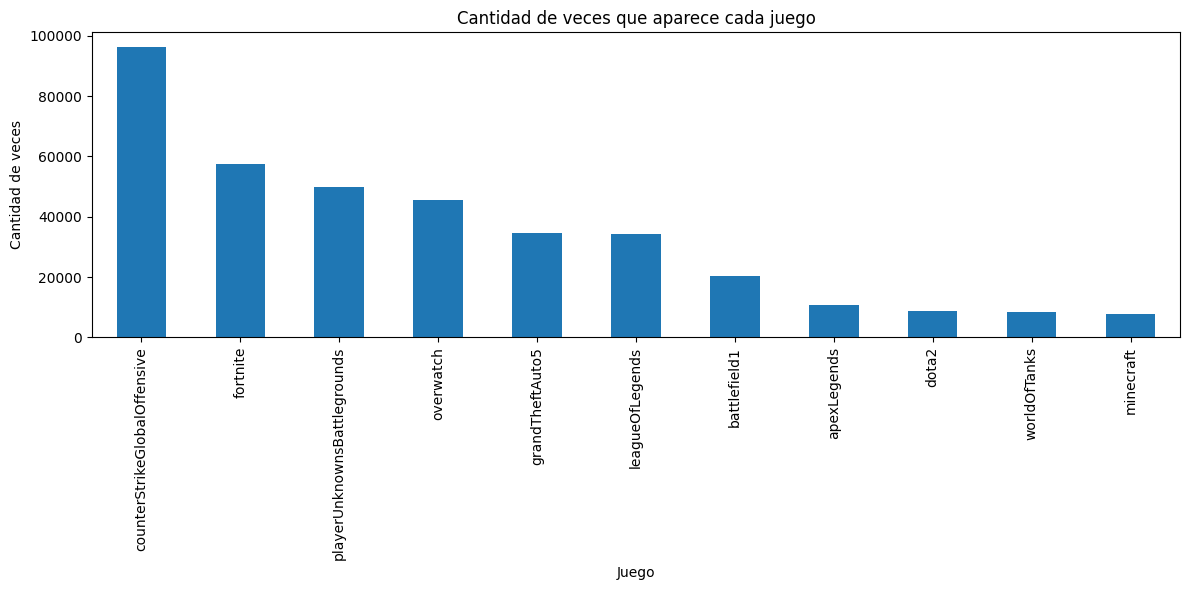

In [6]:
#Graficar la cantidad de veces que aparece cada juego
juegos_count = df['GameName'].value_counts()

plt.figure(figsize=(12, 6))
juegos_count.plot(kind='bar')
plt.xlabel('Juego')
plt.ylabel('Cantidad de veces')
plt.title('Cantidad de veces que aparece cada juego')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

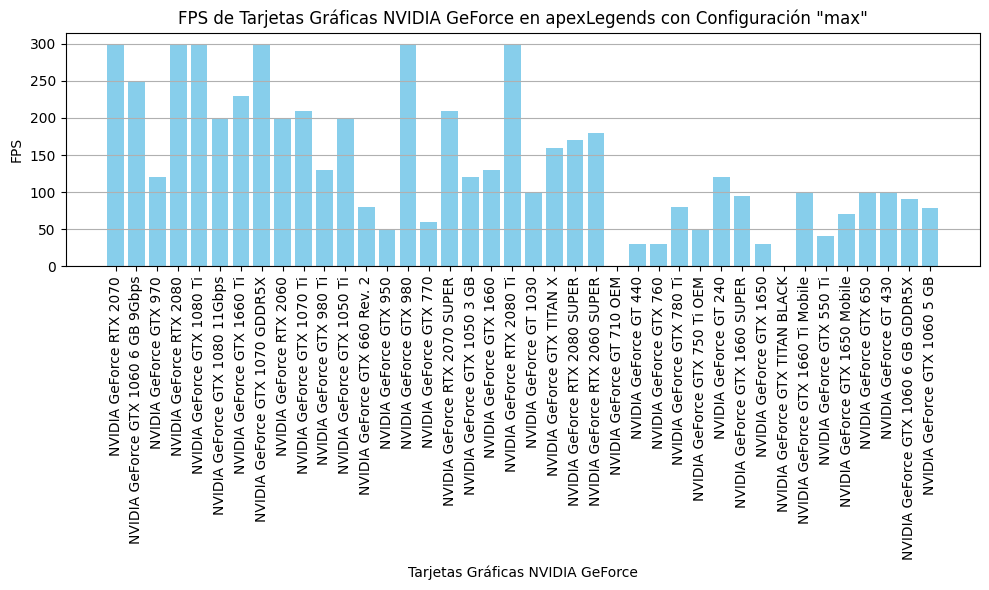

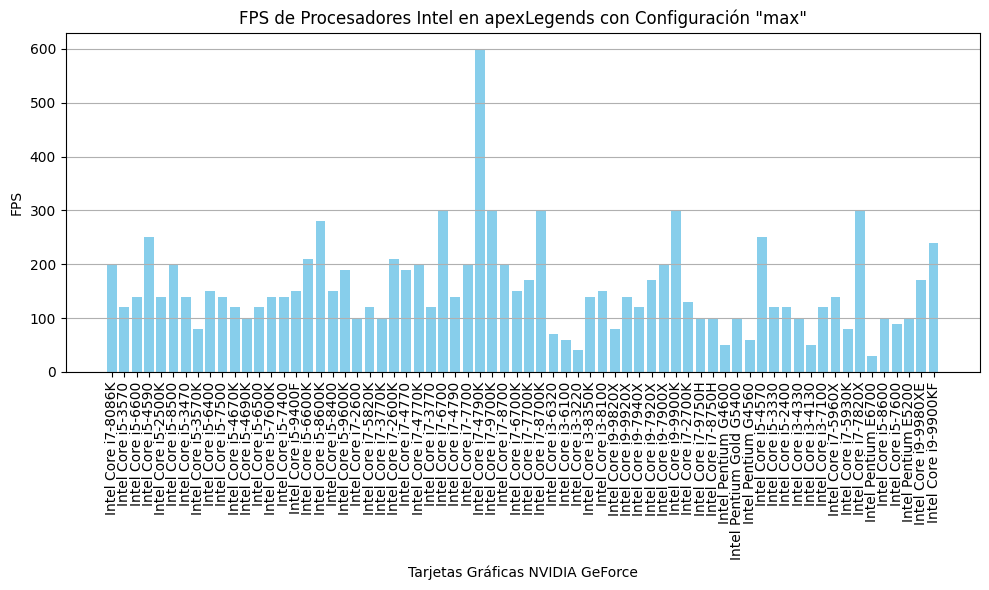

In [9]:
#Grafico de barras, Tarjetas Gráficas NVIDIA GeForce en 'apexLegends' con Configuración 'max' vs FPS

df_nvidia_rtx_max = df[(df['GpuName'].str.contains('NVIDIA GeForce', case=False)) & (df['GameName'] == 'apexLegends') & (df['GameSetting'] == 'max')]

plt.figure(figsize=(10, 6))
plt.bar(df_nvidia_rtx_max['GpuName'], df_nvidia_rtx_max['FPS'], color='skyblue')
plt.title('FPS de Tarjetas Gráficas NVIDIA GeForce en apexLegends con Configuración "max"')
plt.xlabel('Tarjetas Gráficas NVIDIA GeForce')
plt.ylabel('FPS')
plt.xticks(rotation=90) 
plt.grid(axis='y') 
plt.tight_layout()
plt.show()

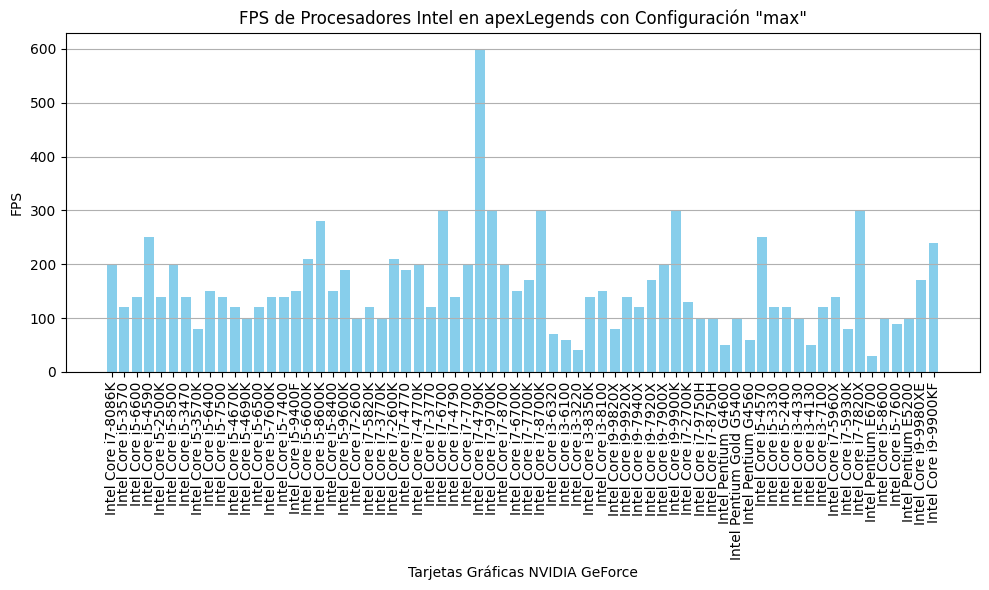

In [11]:
#Grafico de barras, Procesadores Intel en 'apexLegends' con Configuración 'max' vs FPS

df_nvidia_rtx_max = df[(df['CpuName'].str.contains('Intel', case=False)) & (df['GameName'] == 'apexLegends') & (df['GameSetting'] == 'max')]

plt.figure(figsize=(10, 6))
plt.bar(df_nvidia_rtx_max['CpuName'], df_nvidia_rtx_max['FPS'], color='skyblue')
plt.title('FPS de Procesadores Intel en apexLegends con Configuración "max"')
plt.xlabel('Tarjetas Gráficas NVIDIA GeForce')
plt.ylabel('FPS')
plt.xticks(rotation=90) 
plt.grid(axis='y') 
plt.tight_layout()
plt.show()

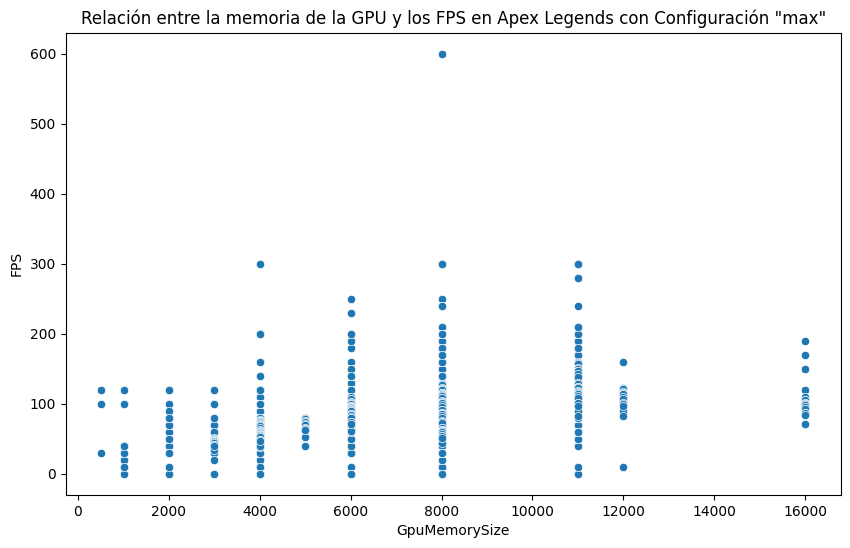

In [21]:
#Grafico de barras, Tarjetas Gráficas NVIDIA GeForce en 'apexLegends' con Configuración 'max' vs FPS

df_apex_legends = df[(df['GameName'] == 'apexLegends') & (df['GameSetting'] == 'max')]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GpuMemorySize', y='FPS', data=df_apex_legends)
plt.title('Relación entre la memoria de la GPU y los FPS en Apex Legends con Configuración "max"')
plt.xlabel('GpuMemorySize')
plt.ylabel('FPS')
plt.show()

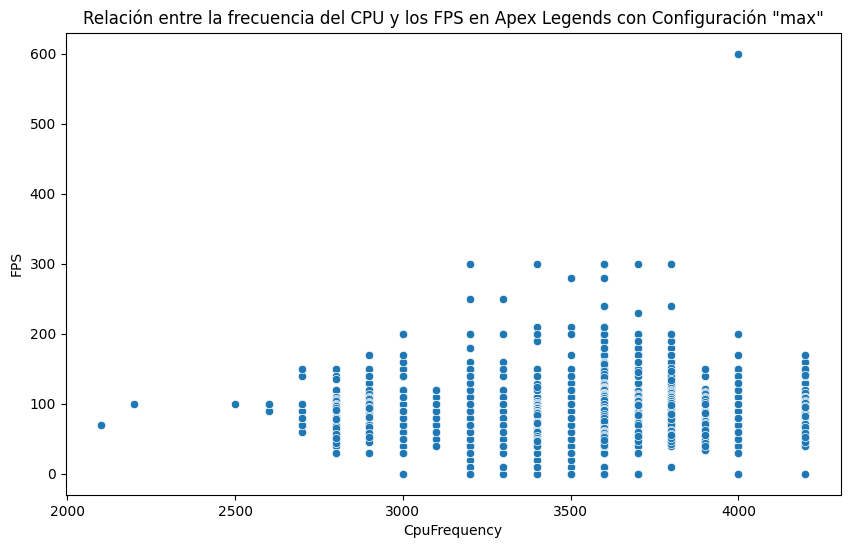

In [22]:
#Grafico de barras, Tarjetas Gráficas NVIDIA GeForce en 'apexLegends' con Configuración 'max' vs FPS

df_apex_legends = df[(df['GameName'] == 'apexLegends') & (df['GameSetting'] == 'max')]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='CpuFrequency', y='FPS', data=df_apex_legends)
plt.title('Relación entre la frecuencia del CPU y los FPS en Apex Legends con Configuración "max"')
plt.xlabel('CpuFrequency')
plt.ylabel('FPS')
plt.show()

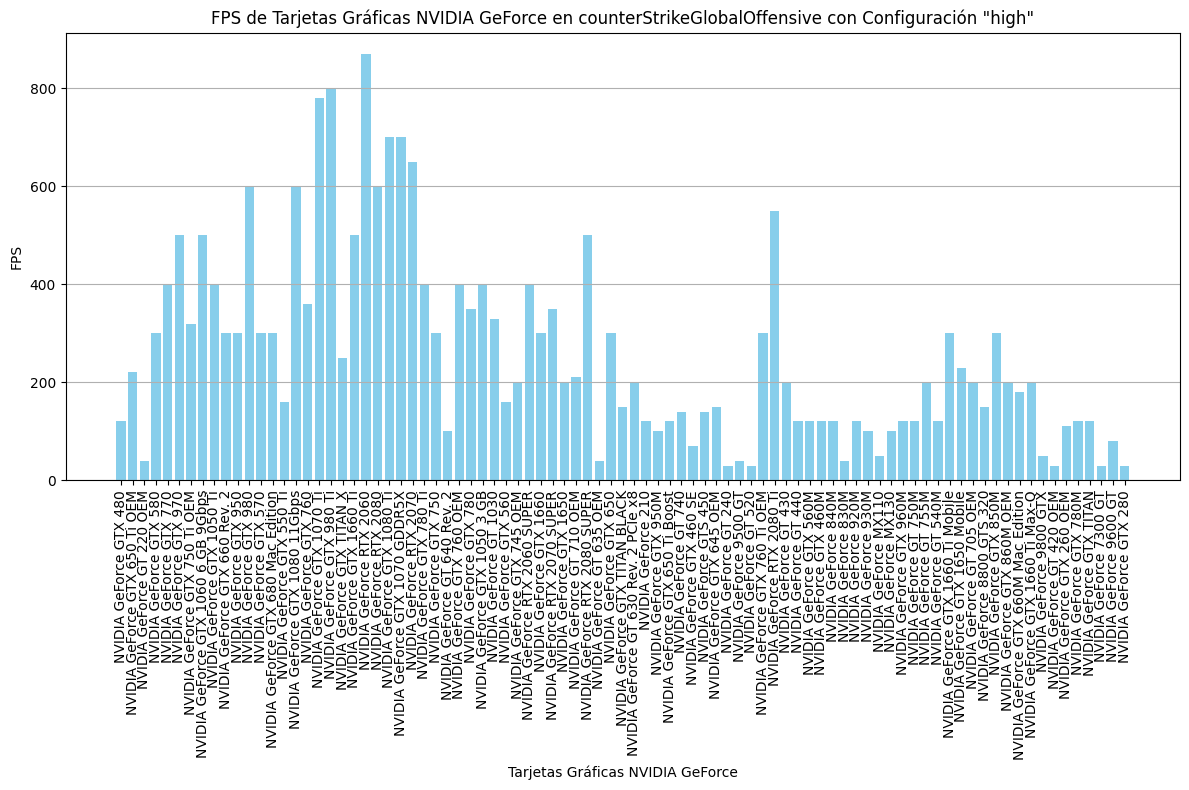

In [15]:
df_nvidia_high = df[(df['GpuName'].str.contains('NVIDIA GeForce', case=False)) & (df['GameName'] == 'counterStrikeGlobalOffensive') & (df['GameSetting'] == 'high')]

#Grafico de barras vs Graficas de NVIDIA en 'counterStrikeGlobalOffensive' con Configuración 'high' vs FPS
plt.figure(figsize=(12, 8))
plt.bar(df_nvidia_high['GpuName'], df_nvidia_high['FPS'], color='skyblue')
plt.title('FPS de Tarjetas Gráficas NVIDIA GeForce en counterStrikeGlobalOffensive con Configuración "high"')
plt.xlabel('Tarjetas Gráficas NVIDIA GeForce')
plt.ylabel('FPS')
plt.xticks(rotation=90)
plt.grid(axis='y')  
plt.tight_layout()
plt.show()

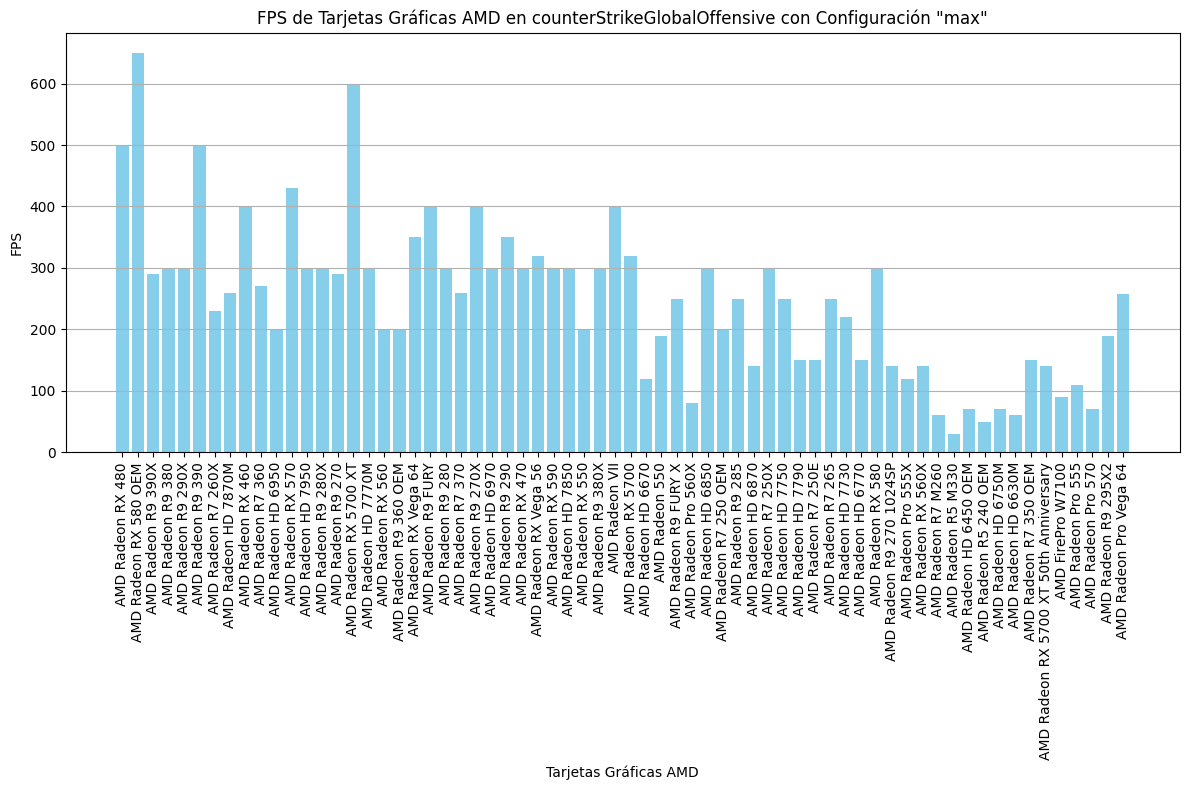

In [16]:
df_amd_max = df[(df['GpuName'].str.contains('AMD', case=False)) & (df['GameName'] == 'counterStrikeGlobalOffensive') & (df['GameSetting'] == 'max')]

#Grafico de barras vs Graficas de AMD en 'counterStrikeGlobalOffensive' con Configuración 'max' vs FPS
plt.figure(figsize=(12, 8))
plt.bar(df_amd_max['GpuName'], df_amd_max['FPS'], color='skyblue')
plt.title('FPS de Tarjetas Gráficas AMD en counterStrikeGlobalOffensive con Configuración "max"')
plt.xlabel('Tarjetas Gráficas AMD')
plt.ylabel('FPS')
plt.xticks(rotation=90) 
plt.grid(axis='y') 
plt.tight_layout()
plt.show()

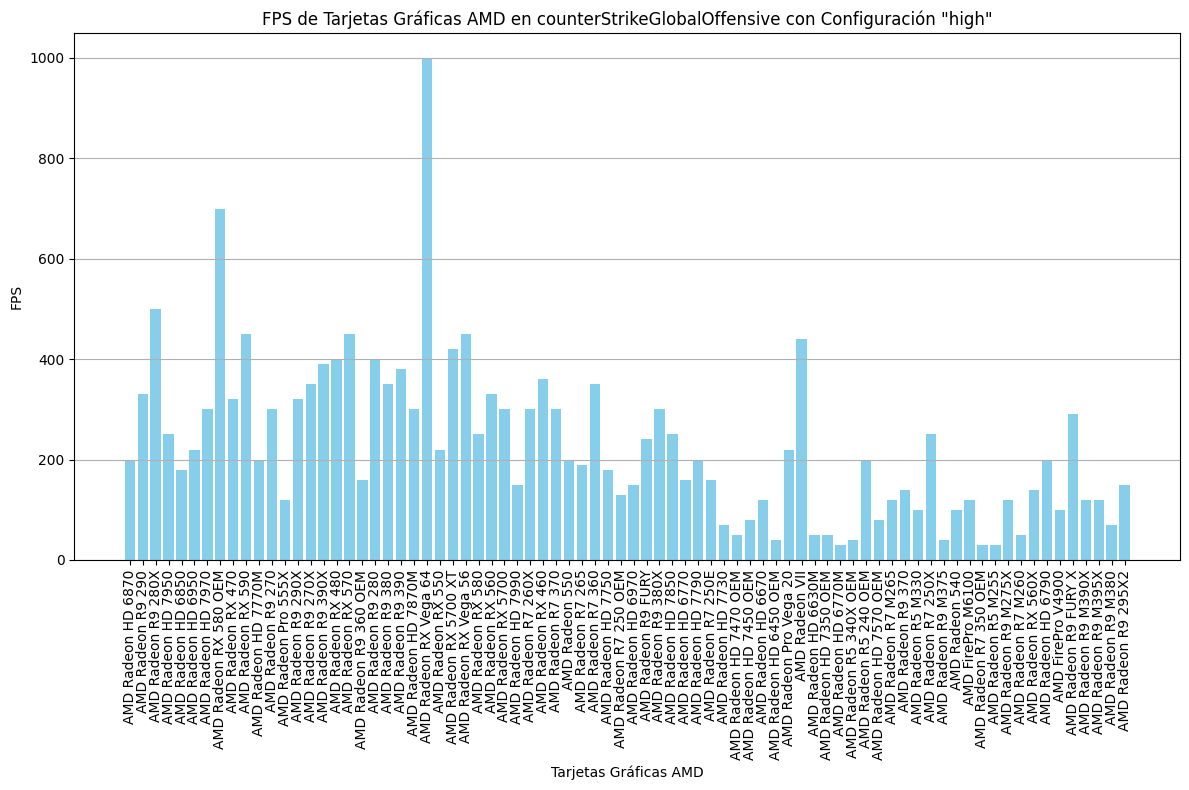

In [17]:
df_amd_high = df[(df['GpuName'].str.contains('AMD', case=False)) & (df['GameName'] == 'counterStrikeGlobalOffensive') & (df['GameSetting'] == 'high')]

#Grafico de barras vs Graficas de AMD en 'counterStrikeGlobalOffensive' con Configuración 'high' vs FPS
plt.figure(figsize=(12, 8))
plt.bar(df_amd_high['GpuName'], df_amd_high['FPS'], color='skyblue')
plt.title('FPS de Tarjetas Gráficas AMD en counterStrikeGlobalOffensive con Configuración "high"')
plt.xlabel('Tarjetas Gráficas AMD')
plt.ylabel('FPS')
plt.xticks(rotation=90)  
plt.grid(axis='y')  
plt.tight_layout()
plt.show()